# Exploring Pandas' features throught the TED Talks dataset

In this tutorial, we will use the [TED Talks dataset](https://www.kaggle.com/rounakbanik/ted-talks), available from Kaggle Datasets under the [CC BY-NC-SA 4.0 license](https://creativecommons.org/licenses/by-nc-sa/4.0/).

This tutorial is partially based on the [Data Science Best Practices with pandas](https://github.com/justmarkham/pycon-2019-tutorial) tutorial presented by Kevin Markham at PyCon2019 on May 2, 2019.

## Import the required libraries

In [137]:
import numpy as np
import pandas as pd
from pathlib import Path 
import matplotlib.pyplot as plt 
from ast import literal_eval
from collections import defaultdict

Sometimes you need to know the pandas version you are using, for example, when you need to consult the pandas documentation. You get the pandas version with:

In [138]:
pd.__version__ 

'2.1.4'

## Load and examine the TED talks dataset

In [139]:
ted = pd.read_csv(Path.cwd()/'../data/ted.csv')

In [140]:
ted.head(10)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869
5,672,"Tony Robbins discusses the ""invisible forces"" ...",1305,TED2006,1138838400,36,Tony Robbins,Tony Robbins: Why we do what we do,1,1151440680,"[{'id': 7, 'name': 'Funny', 'count': 1102}, {'...","[{'id': 229, 'hero': 'https://pe.tedcdn.com/im...",Life coach; expert in leadership psychology,"['business', 'culture', 'entertainment', 'goal...",Why we do what we do,https://www.ted.com/talks/tony_robbins_asks_wh...,20685401
6,919,When two young Mormon missionaries knock on Ju...,992,TED2006,1140739200,31,Julia Sweeney,Julia Sweeney: Letting go of God,1,1152490260,"[{'id': 3, 'name': 'Courageous', 'count': 477}...","[{'id': 22, 'hero': 'https://pe.tedcdn.com/ima...","Actor, comedian, playwright","['Christianity', 'God', 'atheism', 'comedy', '...",Letting go of God,https://www.ted.com/talks/julia_sweeney_on_let...,3769987
7,46,Architect Joshua Prince-Ramus takes the audien...,1198,TED2006,1140652800,19,Joshua Prince-Ramus,Joshua Prince-Ramus: Behind the design of Seat...,1,1152490260,"[{'id': 9, 'name': 'Ingenious', 'count': 195},...","[{'id': 750, 'hero': 'https://pe.tedcdn.com/im...",Architect,"['architecture', 'collaboration', 'culture', '...",Behind the design of Seattle's library,https://www.ted.com/talks/joshua_prince_ramus_...,967741
8,852,Philosopher Dan Dennett calls for religion -- ...,1485,TED2006,1138838400,32,Dan Dennett,Dan Dennett: Let's teach religion -- all relig...,1,1153181460,"[{'id': 3, 'name': 'Courageous', 'count': 562}...","[{'id': 71, 'hero': 'https://pe.tedcdn.com/ima...","Philosopher, cognitive scientist","['God', 'TED Brain Trust', 'atheism', 'brain',...",Let's teach religion -- all religion -- in sch...,https://www.ted.com/talks/dan_dennett_s_respon...,2567958
9,900,"Pastor Rick Warren, author of ""The Purpose-Dri...",1262,T

### Check for the presence of missing values

In [141]:
ted.isna().sum() # speaker_occupation je kolona koja ima missing values

comments              0
description           0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
name                  0
num_speaker           0
published_date        0
ratings               0
related_talks         0
speaker_occupation    6
tags                  0
title                 0
url                   0
views                 0
dtype: int64

Let's identify who are the speakers with missing occupation and if we can identify their occupation from other records (in case they gave more than one talk)

Svaki talk ima svog speakera. Jedan red = jedan talk. Postoji 6 missing values u koloni main_occupation, pa možemo
da proverimo da li za neki drugi ted talk postoji isti speaker, a da na tom mestu piže main_occupation.

In [142]:
speakers_na_occupation = ted.loc[ted.speaker_occupation.isna()].main_speaker.to_list()

Sada ćemo proveriti da li za imena u listi postoji speaker_occupation za neki drugi talk.

In [143]:
def get_no_occupation_speakers(ted,speakers_list):
    for name,occupation in zip(ted.main_speaker, ted.speaker_occupation):
        if name in speakers_list:
            print(name,'-->',occupation)

In [144]:
get_no_occupation_speakers(ted,speakers_na_occupation)

Sonaar Luthra --> nan
Rick Falkvinge --> nan
Gary Kovacs --> nan
Ryan Holladay --> nan
Brian Dettmer --> nan
Boniface Mwangi --> nan


Ne postoje drugi talkovi koje izvode speakeri koji nemaju zanimanje kako bismo utvrdili na neki drugi način occupation.

In [145]:
ted['speaker_occupation'] = ted['speaker_occupation'].apply(lambda occupation:'Unknown' if occupation is np.NaN else occupation)

In [146]:
ted['speaker_occupation'].isna().sum() # sada ne postoji talk za koji je speaker occupation nan  

0

### Transform filming date and publication date into datetime columns

Examine a sample of film_date and published_date values

In [147]:
type(ted['film_date'][0]) #numpy.int64

numpy.int64

In [148]:
type(ted['published_date'][0]) #numpy.int64

numpy.int64

Oba datuma data su u obliku Unix epoch time-a, a to je broj sekundi koji je protekao od 1. januara 1970. 

For more about epoch time, see: [https://www.epochconverter.com/](https://www.epochconverter.com/)

In [149]:
ted['film_date'] = pd.to_datetime(ted['film_date'],unit='s',origin='unix')

In [150]:
ted['published_date'] = pd.to_datetime(ted['published_date'],origin='unix',unit='s')

# origin = 'unix' --> origin specificira tačku od koje se broji datum, a vrednost unix podrazumeva da se on broji od 1.1.1970.
# unit = 's' --> unit specificira jedinice u kojima je obračunata vrednost kolone, a s specificira kao vrednost da su u pitanju sekunde 

### How to change columns' names? 

The most flexible method for renaming columns is the `rename()` method. One should pass it a dictionary in which the keys are the old column names, while the values are the new names, and specify the axis to be 'columns'.

For example, rename columns 'comments' and 'views' to 'comment_count' and 'view_count', respectively

In [151]:
rename_dict = {'comments':'comment_count', 'views':'view_count'}
ted.rename(rename_dict,axis='columns', inplace=True)

In [152]:
ted.columns

Index(['comment_count', 'description', 'duration', 'event', 'film_date',
       'languages', 'main_speaker', 'name', 'num_speaker', 'published_date',
       'ratings', 'related_talks', 'speaker_occupation', 'tags', 'title',
       'url', 'view_count'],
      dtype='object')

## Task 1: Compute and plot the number of talks that took place each year

Prvo ćemo ekstrakovati polje godine iz datuma, zatim grupisati ted po godinama i izračunati koliko ima naslova po svakoj godini. 

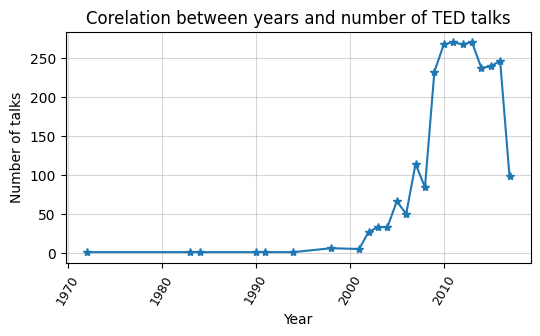

In [153]:
year_talk_count = ted.groupby(ted['film_date'].dt.year)['title'].count()
x = year_talk_count.index
y = year_talk_count.values
fg, ax = plt.subplots(figsize=(6,3))
ax.plot(x, y, marker='*')
ax.grid(visible=True,alpha=0.5)
ax.tick_params(axis='x',labelsize=9,labelrotation=60)
ax.set_xlabel('Year')
ax.set_ylabel('Number of talks')
ax.set_title('Corelation between years and number of TED talks')
plt.show()

## Task 2: Which TED events attracted the most attention?

Consider the number of views as a proxy of an event's attractiveness. Neka je stepen atraktivnost Ted eventa dat preko broja pregleda. Za svaki event izračunaćemo ukupne preglede, prosečne preglede (zato što neki TED eventovi mogu imati samo jedan talk, a ne više njih) i broj talkova po eventu. Rezultate ćemo sortirati preko prosečnih pregleda. Ubacićemo kolonu broj eventova zato što je moguće da postoje neki eventovi koji imaju vrlo mali broj ted talkova, a gde je taj jedan talk veoma popularan, a ostatak talkova nije popularan. 

In [154]:
event_atractiveness = ted.groupby('event')['view_count'].agg(['mean','sum','count']).sort_values(by='mean',ascending=False)

In [155]:
event_atractiveness.columns=['Mean view per talk', 'Total views','Number of talks']
event_atractiveness.head(10)

,Mean view per talk,Total views,Number of talks
event,,,
TEDxPuget Sound,34309432.0,34309432,1
TEDxHouston,16140250.5,32280501,2
TEDxBloomington,9484259.5,18968519,2
TEDxCreativeCoast,8444981.0,8444981,1
TEDxNorrkoping,6569493.0,6569493,1
TEDxUW,5917201.0,5917201,1
TEDxLinnaeusUniversity,4984884.0,4984884,1
TEDxGoldenGatePark 2012,4811180.0,4811180,1
TEDxCHUV,4682458.0,4682458,1


Vidimo da 10 najpopularnijih TED eventova, gledano po prosečnim pregledima po talku, ima maksimalno dva TED talka. Sada ćemo proveriti statistiku za broj talkova i prosečne preglede za svaki event. 

In [156]:
event_atractiveness.loc[event_atractiveness['Number of talks']>2]

,Mean view per talk,Total views,Number of talks
event,,,
TED Talks Education,4.375104e+06,35000830,8
TEDGlobal>Geneva,3.385408e+06,37239487,11
TED2006,3.274345e+06,147345533,45
TEDxManhattanBeach,3.251704e+06,9755112,3
TEDSalon NY2013,2.861639e+06,31478034,11
...,...,...,...
TEDxYYC,3.699607e+05,1109882,3
Business Innovation Factory,3.040860e+05,912258,3
TEDxPhoenix,2.846855e+05,1138742,4


Proveriti eventove koji imaju broj talkova koji je iznad prosečnog broja talkova. Za to nam je potrebna medijana.

In [157]:
median_talks = event_atractiveness.describe().loc['50%','Number of talks']

50% eventova ima više od dva talka.

In [158]:
top_10_atractive_events = event_atractiveness.loc[event_atractiveness['Number of talks']>median_talks].sort_values(by='Mean view per talk', ascending=False).head(10)
top_10_atractive_events

,Mean view per talk,Total views,Number of talks
event,,,
TED Talks Education,4.375104e+06,35000830,8
TEDGlobal>Geneva,3.385408e+06,37239487,11
TED2006,3.274345e+06,147345533,45
TEDxManhattanBeach,3.251704e+06,9755112,3
TEDSalon NY2013,2.861639e+06,31478034,11
TED2004,2.693644e+06,83502957,31
TEDGlobal 2013,2.584163e+06,170554736,66
TEDGlobalLondon,2.540275e+06,20322197,8
TEDWomen 2013,2.504863e+06,22543766,9


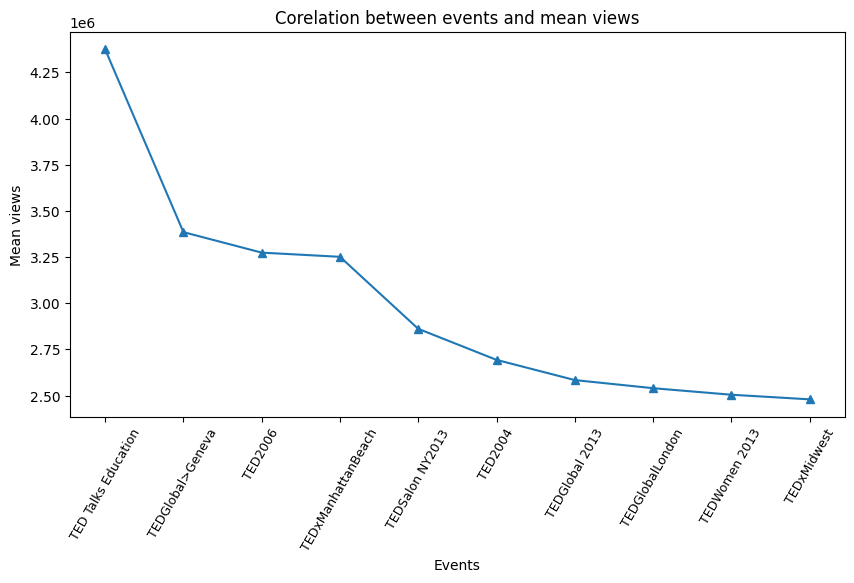

In [159]:
x = top_10_atractive_events.index
y = top_10_atractive_events['Mean view per talk'].values
fg, ax = plt.subplots(figsize=(10,5))
ax.plot(x,y,marker='^')
ax.set_xlabel('Events')
ax.set_ylabel('Mean views')
ax.set_title('Corelation between events and mean views')
ax.tick_params(axis='x', labelrotation=60, labelsize=9)

## Task 3: Explore talks based on their ratings

Prvo ćemo pogledati ratings kolonu ted dataFrame-a.

In [160]:
type(ted['ratings'][0]) # vidimo da je tip podatka string.
ted['ratings'][0] # vidimo da ovo nije lista json vrednosti, nego string. Potrebno je pretvoriti ovaj string u listu json vrednosti. 

"[{'id': 7, 'name': 'Funny', 'count': 19645}, {'id': 1, 'name': 'Beautiful', 'count': 4573}, {'id': 9, 'name': 'Ingenious', 'count': 6073}, {'id': 3, 'name': 'Courageous', 'count': 3253}, {'id': 11, 'name': 'Longwinded', 'count': 387}, {'id': 2, 'name': 'Confusing', 'count': 242}, {'id': 8, 'name': 'Informative', 'count': 7346}, {'id': 22, 'name': 'Fascinating', 'count': 10581}, {'id': 21, 'name': 'Unconvincing', 'count': 300}, {'id': 24, 'name': 'Persuasive', 'count': 10704}, {'id': 23, 'name': 'Jaw-dropping', 'count': 4439}, {'id': 25, 'name': 'OK', 'count': 1174}, {'id': 26, 'name': 'Obnoxious', 'count': 209}, {'id': 10, 'name': 'Inspiring', 'count': 24924}]"

Za pretvaranje stringa u listu json vrednosti koristi se literal eval funkcija iz ast paketa. AST = abstract syntax tree. 
# literal_eval() - transformiše string u literal, listu, tuple ili bilo koji container object 

In [161]:
ted['ratings']=ted['ratings'].apply(literal_eval)

In [162]:
type(ted['ratings'][0])

list

### Task 3.1: For each talk, find the 3 most frequent ratings

Za svaki talk proći kroz listu dictionary - ja i izdvojiti 3 najfrekventnije ocene. 
- Prvo ćemo testirati kako da dobijemo top3 ocene za listu rejtinga za prvi TED talk.

In [163]:
sorted(ted['ratings'][0], key=lambda rating:rating['count'], reverse=True)[0:3]

[{'id': 10, 'name': 'Inspiring', 'count': 24924},
 {'id': 7, 'name': 'Funny', 'count': 19645},
 {'id': 24, 'name': 'Persuasive', 'count': 10704}]

In [164]:
def get_top_3_ratings(list_of_ratings):
    return ', '.join([rating['name'] for rating in sorted(list_of_ratings, key=lambda rating:rating['count'], reverse=True)[0:3]])

In [165]:
top_3_list = []
for rating in ted['ratings']:
    top_3_list.append(get_top_3_ratings(rating))

In [166]:
top_3_series = pd.Series(top_3_list, name='Top3_Ratings')

In [167]:
ted = pd.concat([ted,top_3_series], axis='columns')

In [168]:
ted

,comment_count,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,view_count,Top3_Ratings
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,2006-02-25,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,"Inspiring, Funny, Persuasive"
1,265,With the same humor and humanity he exuded in ...,977,TED2006,2006-02-25,43,Al Gore,Al Gore: Averting the climate crisis,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,"Funny, Informative, Inspiring"
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,2006-02-24,26,David Pogue,David Pogue: Simplicity sells,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292,"Funny, Informative, Inspiring"
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,2006-02-26,35,Majora Carter,Majora Carter: Greening the ghetto,1,2006-06-27 00:11:00,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550,"Inspiring, Courageous, Persuasive"
4,593,You've never seen data presented like this. Wi...,1190,TED2006,2006-02-22,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,2006-06-27 20:38:00,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869,"Informative, Fascinating, Jaw-dropping"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2545,17,"Between 2008 and 2016, the United States depor...",476,TED2017,2017-06-06,4,Duarte Geraldino,Duarte Geraldino: What we're missing in the de...,1,2017-09-19 20:00:16,"[{'id': 3, 'name': 'Courageous', 'count': 24},...","[{'id': 2596, 'hero': 'https://pe.tedcdn.com/i...",Journalist,"['TED Residency', 'United States', 'community'...",What we're missing in the debate about immigra...,https://www.ted.com/talks/duarte_geraldino_wha...,450430,"Informative, Inspiring, Courageous"
2546,6,How can you study Mars without a spaceship? He...,290,TED2017,2017-04-24,3,Armando Azua-Bustos,Armando Azua-Bustos: The most Martian place on...,1,2017-09-20 15:02:17,"[{'id': 22, 'name': 'Fascinating', 'count': 32...","[{'id': 2491, 'hero': 'https://pe.tedcdn.com/i...",Astrobiologist,"['Mars', 'South America', 'TED Fellows', 'astr...",The most Martian place on Earth,https://www.ted.com/talks/armando_azua_bustos_...,417470,"Informative, Fascinating, Inspiring"
2547,10,Science fiction visions of the future show us ...,651,TED2017,2017-04-24,1,Radhika Nagpal,Radhika Nagpal: What intelligent machines can ...,1,2017-09-21 15:01:35,"[{'id': 1, 'name': 'Beautiful', 'count': 14}, ...","[{'id': 2346, 'hero': 'https://pe.tedcdn.com/i...",Robotics engineer,"['AI', 'ants', 'fish', 'future', 'innovation',...",What intelligent machines can learn from a sch...,https://www.ted.com/talks/radhika_nagpal_what_...,375647,"Informative, Inspiring, Fascinating"
2548,32,In an unmis

Ispisati iz kolone top 3 rejtinge talkova koji potpadaju u top 10 najgledanijih.

In [169]:
ted.sort_values(by='view_count',ascending=False).head(10)['Top3_Ratings']

0               Inspiring, Funny, Persuasive
1346     Inspiring, Fascinating, Informative
677       Inspiring, Persuasive, Fascinating
837         Inspiring, Courageous, Beautiful
452          Funny, Informative, Fascinating
1776      Informative, Inspiring, Persuasive
201     Inspiring, Fascinating, Jaw-dropping
5         Inspiring, Persuasive, Fascinating
2114           Funny, Ingenious, Fascinating
1416      Courageous, Inspiring, Informative
Name: Top3_Ratings, dtype: object

### Task 3.2 Which TED events had the most 'Jaw-dropping' talks?

1. Način rešavanja jeste da proverimo da li je Jaw-dropping u top 3 najfrekventnije ocene i ukoliko jeste setujemo
vrednost polja kolone isJawDropping na True, a u suprotnom na False. Onda izračunamo sumu True vrednosti za svaki
event.

In [170]:
def is_jaw_dropping_talk(top3_ratings):
    top3_array = top3_ratings.split(', ')
    for rating in top3_array:
        if rating == 'Jaw-dropping':
            return True
    return False

In [171]:
jaw_dropping_series = ted['Top3_Ratings'].apply(is_jaw_dropping_talk)
jaw_dropping_series.name = 'Is_Jaw_Dropping'

In [172]:
ted = pd.concat([ted,jaw_dropping_series],axis='columns')

In [173]:
ted 

,comment_count,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,view_count,Top3_Ratings,Is_Jaw_Dropping
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,2006-02-25,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,"Inspiring, Funny, Persuasive",False
1,265,With the same humor and humanity he exuded in ...,977,TED2006,2006-02-25,43,Al Gore,Al Gore: Averting the climate crisis,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,"Funny, Informative, Inspiring",False
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,2006-02-24,26,David Pogue,David Pogue: Simplicity sells,1,2006-06-27 00:11:00,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292,"Funny, Informative, Inspiring",False
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,2006-02-26,35,Majora Carter,Majora Carter: Greening the ghetto,1,2006-06-27 00:11:00,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550,"Inspiring, Courageous, Persuasive",False
4,593,You've never seen data presented like this. Wi...,1190,TED2006,2006-02-22,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,2006-06-27 20:38:00,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869,"Informative, Fascinating, Jaw-dropping",True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2545,17,"Between 2008 and 2016, the United States depor...",476,TED2017,2017-06-06,4,Duarte Geraldino,Duarte Geraldino: What we're missing in the de...,1,2017-09-19 20:00:16,"[{'id': 3, 'name': 'Courageous', 'count': 24},...","[{'id': 2596, 'hero': 'https://pe.tedcdn.com/i...",Journalist,"['TED Residency', 'United States', 'community'...",What we're missing in the debate about immigra...,https://www.ted.com/talks/duarte_geraldino_wha...,450430,"Informative, Inspiring, Courageous",False
2546,6,How can you study Mars without a spaceship? He...,290,TED2017,2017-04-24,3,Armando Azua-Bustos,Armando Azua-Bustos: The most Martian place on...,1,2017-09-20 15:02:17,"[{'id': 22, 'name': 'Fascinating', 'count': 32...","[{'id': 2491, 'hero': 'https://pe.tedcdn.com/i...",Astrobiologist,"['Mars', 'South America', 'TED Fellows', 'astr...",The most Martian place on Earth,https://www.ted.com/talks/armando_azua_bustos_...,417470,"Informative, Fascinating, Inspiring",False
2547,10,Science fiction visions of the future show us ...,651,TED2017,2017-04-24,1,Radhika Nagpal,Radhika Nagpal: What intelligent machines can ...,1,2017-09-21 15:01:35,"[{'id': 1, 'name': 'Beautiful', 'count': 14}, ...","[{'id': 2346, 'hero': 'https://pe.tedcdn.com/i...",Robotics engineer,"['AI', 'ants', 'fish', 'future', 'innovation',...",What intelligent machines can learn from a sch...,https://www.ted.com/talks/radhika_nagpal_what_...,375

In [178]:
ted_jaw_dropping_events = ted.groupby('event')['Is_Jaw_Dropping'].agg(['sum','mean','count']).sort_values(by='sum',ascending=False)
ted_jaw_dropping_events.columns=['Number of jaw - dropping events','% of jaw-dropping in total','Total']
ted_jaw_dropping_events

,Number of jaw - dropping events,% of jaw-dropping in total,Total
event,,,
TED2007,17,0.250000,68
TED2009,16,0.192771,83
TED2013,14,0.181818,77
TED2008,11,0.192982,57
TED2011,10,0.142857,70
...,...,...,...
TEDxABQ,0,0.000000,1
TEDYouth 2015,0,0.000000,5
TEDYouth 2014,0,0.000000,7


### Task 3.3 Compute the number of positive, negative, and neutral ratings, then add one column for each of these counts

This practically means that we should add 3 columns - pos_ratings, neg_ratings, neutral_ratings - with the corresponding rating counts.

We will achieve this through a multistep process:

1) Identify different kinds of rating categories that have been used to characterise talks and classify them as positive, negative, or neutral

2) Create a function for computing the number of ratings in each of the 3 groups (positive, negative, neutral)

3) Add a column - ratings_counts - storing the computed values as tuples of the form (pos_ratings, neg_ratings, neutral_ratings)

4) Transform the ratings_counts column into 3 columns: pos_ratings, neg_ratings, neutral_ratings 

**Step 1.1**: Identifikovati set različitih kategorija ocena koje su date nekom talku.

In [179]:
set_of_ratings = set()
for ratings in ted['ratings']:
    for rating in ratings:
        set_of_ratings.add(rating['name'])

In [180]:
for elem in set_of_ratings:
    print(elem)

Confusing
Jaw-dropping
Inspiring
Courageous
Beautiful
Funny
Informative
Persuasive
Longwinded
Fascinating
Unconvincing
OK
Obnoxious
Ingenious


In [181]:
positive_ratings = {'Jaw-dropping','Inspiring','Courageous','Beautiful','Funny','Informative','Persuasive','Fascinating','Ingenious'}
negative_ratings = {'Longwinded','Confusing','Unconvincing','Obnoxious'}
neutral_ratings = {'OK'}

**Step 1.2** Izračunati za svaki ted talk broj pozitivnih, broj negativnih i broj neutralnih ocena. 

In [212]:
def get_ratings_stats(ratings):
    ratings_dict = defaultdict(int)
    for rating in ratings:
        if rating['name'] in positive_ratings:
            ratings_dict['Positive']+=int(rating['count'])
        if rating['name'] in negative_ratings:
            ratings_dict['Negative'] += int(rating['count'])
        else:
            ratings_dict['Neutral'] += int(rating['count'])
    return dict(ratings_dict)

In [213]:
list_of_ratings_stats = []
for ratings in ted['ratings']:
    list_of_ratings_stats.append(get_ratings_stats(ratings))

In [214]:
for elem in list_of_ratings_stats:
    print(elem)
print(len(list_of_ratings_stats))

{'Positive': 91538, 'Neutral': 92712, 'Negative': 1138}
{'Positive': 2169, 'Neutral': 2372, 'Negative': 564}
{'Positive': 2327, 'Neutral': 2473, 'Negative': 351}
{'Positive': 3487, 'Neutral': 3572, 'Negative': 156}
{'Positive': 25062, 'Neutral': 25310, 'Negative': 310}
{'Positive': 13617, 'Neutral': 14058, 'Negative': 1298}
{'Positive': 4910, 'Neutral': 5218, 'Negative': 780}
{'Positive': 879, 'Neutral': 942, 'Negative': 82}
{'Positive': 3179, 'Neutral': 3333, 'Negative': 613}
{'Negative': 1626, 'Positive': 6456, 'Neutral': 6701}
{'Positive': 1665, 'Neutral': 1704, 'Negative': 76}
{'Positive': 528, 'Neutral': 554, 'Negative': 38}
{'Positive': 854, 'Neutral': 865, 'Negative': 21}
{'Positive': 8000, 'Neutral': 8188, 'Negative': 129}
{'Positive': 683, 'Neutral': 713, 'Negative': 68}
{'Positive': 6051, 'Neutral': 6146, 'Negative': 93}
{'Positive': 4470, 'Neutral': 4538, 'Negative': 141}
{'Positive': 1715, 'Neutral': 1745, 'Negative': 43}
{'Positive': 1341, 'Neutral': 1409, 'Negative': 522}

In [218]:
ted.drop(['Positive','Negative','Neutral'], axis='columns', inplace=True)

In [220]:
ted = pd.concat([ted,pd.DataFrame(list_of_ratings_stats)], axis='columns')

In [221]:
ted 

,comment_count,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,...,speaker_occupation,tags,title,url,view_count,Top3_Ratings,Is_Jaw_Dropping,Positive,Neutral,Negative
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,2006-02-25,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,2006-06-27 00:11:00,...,Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,"Inspiring, Funny, Persuasive",False,91538,92712,1138
1,265,With the same humor and humanity he exuded in ...,977,TED2006,2006-02-25,43,Al Gore,Al Gore: Averting the climate crisis,1,2006-06-27 00:11:00,...,Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,"Funny, Informative, Inspiring",False,2169,2372,564
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,2006-02-24,26,David Pogue,David Pogue: Simplicity sells,1,2006-06-27 00:11:00,...,Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292,"Funny, Informative, Inspiring",False,2327,2473,351
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,2006-02-26,35,Majora Carter,Majora Carter: Greening the ghetto,1,2006-06-27 00:11:00,...,Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550,"Inspiring, Courageous, Persuasive",False,3487,3572,156
4,593,You've never seen data presented like this. Wi...,1190,TED2006,2006-02-22,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,2006-06-27 20:38:00,...,Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869,"Informative, Fascinating, Jaw-dropping",True,25062,25310,310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2545,17,"Between 2008 and 2016, the United States depor...",476,TED2017,2017-06-06,4,Duarte Geraldino,Duarte Geraldino: What we're missing in the de...,1,2017-09-19 20:00:16,...,Journalist,"['TED Residency', 'United States', 'community'...",What we're missing in the debate about immigra...,https://www.ted.com/talks/duarte_geraldino_wha...,450430,"Informative, Inspiring, Courageous",False,174,174,18
2546,6,How can you study Mars without a spaceship? He...,290,TED2017,2017-04-24,3,Armando Azua-Bustos,Armando Azua-Bustos: The most Martian place on...,1,2017-09-20 15:02:17,...,Astrobiologist,"['Mars', 'South America', 'TED Fellows', 'astr...",The most Martian place on Earth,https://www.ted.com/talks/armando_azua_bustos_...,417470,"Informative, Fascinating, Inspiring",False,137,150,1
2547,10,Science fiction visions of the future show us ...,651,TED2017,2017-04-24,1,Radhika Nagpal,Radhika Nagpal: What intelligent machines can ...,1,2017-09-21 15:01:35,...,Robotics engineer,"['AI', 'ants', 'fish', 'future', 'innovation',...",What intelligent machines can learn from a sch...,https://www.ted.com/talks/radhika_nagpal_what_...,375647,"Informative, Inspiring, Fascinating",False,126,130,6
2548,32,In an unmissable talk about race and politics ...,1100,TEDxMileHigh,2017-07-08,1,Theo E.J. Wilson,Theo E.J. Wilson: A black man goes undercover ...,1,2017-09-21 20:00:42,...,Public intellectual,"['Internet', 'TEDx', 'United States', 'communi...",A black man goes undercover in the alt-right,https://www.ted.com/talks/theo_e_j_wilson_a_bl...,419309,"Inspiring, Courageous, Informative",False,561,566,17


### Task 3.4 Find speakers with the highest average number of positive ratings per talk

In [233]:
speakers_positive =ted.groupby('main_speaker')['Positive'].agg(['sum','count']).sort_values(by='sum',ascending=False)
speakers_positive.columns=['Sum of positive ratings','Talks_Count']
speakers_positive

,Sum of positive ratings,Talks_Count
main_speaker,,
Ken Robinson,131137,4
Brené Brown,73144,2
Simon Sinek,69920,2
Jill Bolte Taylor,68436,1
Amy Cuddy,63814,1
...,...,...
Karoliina Korppoo,94,1
Françoise Mouly,93,1
Inara George,77,1


In [234]:
medina_talks = speakers_positive.describe().loc['50%','Talks_Count']

In [236]:
speakers_positive.loc[speakers_positive['Talks_Count']>medina_talks].head(10)

,Sum of positive ratings,Talks_Count
main_speaker,,
Ken Robinson,131137,4
Brené Brown,73144,2
Simon Sinek,69920,2
Hans Rosling,61260,9
David Gallo,32686,3
Chimamanda Ngozi Adichie,30858,2
Julian Treasure,29752,5
Dan Gilbert,28587,3
Elizabeth Gilbert,28099,2


### Task 3.5 Identify 10 speakers with the largest proportion of negative ratings 

In [255]:
sum_of_ratings = ted[['Positive','Negative','Neutral']].sum(axis='columns')
sum_of_ratings.name='Total'
sum_of_ratings

0       185388
1         5105
2         5151
3         7215
4        50682
         ...  
2545       366
2546       288
2547       262
2548      1144
2549       236
Name: Total, Length: 2550, dtype: int64

In [257]:
ted = pd.concat([ted,sum_of_ratings],axis='columns')

In [260]:
ted['Negative_Prop']=ted['Negative']/ted['Total']

In [279]:
stats = ted.groupby('main_speaker')['Negative_Prop'].mean().sort_values(ascending=False).describe()
median = stats.loc['50%']
neg_prop = ted.groupby('main_speaker')['Negative_Prop'].mean().sort_values(ascending=False)

### Task 3.6 Which occupations deliver the funniest TED talks on average?

(Consider also how well represented occupations are)

We'll start by computing the number of Funny ratings per talk and storing the results in the (new) column 'funny_ratings'

In [280]:
def funny_count(ratings):
    funny_sum=0
    for rating in ratings:
        if rating['name'] == 'Funny':
            funny_sum += rating['count']
    return funny_sum

In [281]:
funny_list=[]
for ratings in ted['ratings']:
    funny_list.append(funny_count(ratings))
    

In [297]:
funny_series = pd.Series(funny_list)
funny_series.name='Funny'
funny_series

0       19645
1         544
2         964
3          59
4        1390
        ...  
2545        1
2546       20
2547        1
2548       63
2549        0
Name: Funny, Length: 2550, dtype: int64

In [298]:
ted = pd.concat([ted, funny_series],axis='columns')

In [315]:
occupation_funny = ted.groupby('speaker_occupation')['Funny'].agg(['sum','count','mean']) 
occupation_funny.columns = ['Sum of funny ratings','Funny talks count','Mean sum of funny ratings']
occupation_funny.describe() # 75% okupacija ima samo jedan talk. Hajde da posmatramo one koje imaju više
occupation_funny['Funny talks count'].quantile([0.75, 0.8, 0.9, 0.95]) # samo 5% okupacija ima vise od 4 talka
occupation_funny.loc[occupation_funny['Funny talks count']>4].sort_values(by='Mean sum of funny ratings', ascending=False)

,Sum of funny ratings,Funny talks count,Mean sum of funny ratings
speaker_occupation,,,
Comedian,11034,6,1839.000000
Data scientist,6098,5,1219.600000
"Performance poet, multimedia artist",5073,6,845.500000
Global health expert; data visionary,5401,10,540.100000
Psychologist,11387,26,437.961538
...,...,...,...
"Environmentalist, futurist",44,5,8.800000
Surgeon,35,5,7.000000
Investor and advocate for moral leadership,31,5,6.200000


### Task 4. Examine the topics of the top 100 'Inspiring' talks, present them in a tag cloud 

While talks can be ranked based on a variety of criteria, we will value and rank them based on the proportion of positive ratings

In [316]:
def is_inspiring(top3):
    lst = top3.split(', ')
    for rating in lst:
        if rating =='Inspiring':
            return True
    return False 

In [317]:
ted['Inspiring_Count'] = ted['Positive']/ted['Total']

In [318]:
insp_list = []
for rating in ted['Top3_Ratings']:
    insp_list.append(is_inspiring(rating))
    

In [323]:
isinsp = pd.Series(insp_list)
isinsp.name="Inspiring"
isinsp

0        True
1        True
2        True
3        True
4       False
        ...  
2545     True
2546     True
2547     True
2548     True
2549     True
Name: Inspiring, Length: 2550, dtype: bool

In [325]:
ted = pd.concat([ted,isinsp],axis='columns')

In [327]:
ted['PosProp']= ted['Positive']/ted['Total']

In [331]:
top100 = ted.loc[ted['Inspiring']==True].sort_values(by='PosProp',ascending=False).head(100)

In [340]:
top100.tags = top100.tags.apply(literal_eval)

In [342]:
set_tags = set()
for tags in top100.tags:
    for tag in tags:
        set_tags.add(tag)

In [343]:
set_tags # svi tagovi iz top100 koji postoje

{'Addiction',
 'Africa',
 'Asia',
 'Autism spectrum disorder',
 'Bioethics',
 'Blindness',
 'Criminal Justice',
 'DNA',
 'Egypt',
 'Europe',
 'Gender equality',
 'Google',
 'Human body',
 'Internet',
 'LGBT',
 'Middle East',
 'PTSD',
 'Senses',
 'Slavery',
 'TED Brain Trust',
 'TED Fellows',
 'TED Prize',
 'TED Residency',
 'TED en Español',
 'TEDMED',
 'TEDNYC',
 'TEDYouth',
 'TEDx',
 'United States',
 'activism',
 'adventure',
 'aging',
 'agriculture',
 'ancient world',
 'animals',
 'animation',
 'archaeology',
 'architecture',
 'art',
 'beauty',
 'big problems',
 'biodiversity',
 'biology',
 'biomechanics',
 'biomimicry',
 'biotech',
 'body language',
 'botany',
 'brain',
 'bullying',
 'business',
 'cancer',
 'chemistry',
 'children',
 'choice',
 'cities',
 'climate change',
 'code',
 'cognitive science',
 'collaboration',
 'comedy',
 'communication',
 'community',
 'compassion',
 'composing',
 'computers',
 'conducting',
 'conservation',
 'creativity',
 'crime',
 'crowdsourcing',
 

In [346]:
dict_of_tags=defaultdict(int)
for tags in top100.tags:
    for tag in tags:
        dict_of_tags[tag]+=1
        

In [356]:
final_dict_tags = dict(sorted(dict_of_tags.items(),key=lambda el:el[1], reverse=True))

In [357]:
final_dict_tags

{'TEDx': 22,
 'humanity': 18,
 'health': 18,
 'social change': 17,
 'culture': 15,
 'global issues': 15,
 'education': 15,
 'personal growth': 15,
 'children': 14,
 'technology': 13,
 'science': 13,
 'society': 12,
 'community': 12,
 'health care': 11,
 'innovation': 10,
 'design': 10,
 'family': 10,
 'TED Fellows': 9,
 'medicine': 9,
 'animals': 9,
 'entertainment': 9,
 'communication': 9,
 'identity': 8,
 'women': 8,
 'creativity': 8,
 'teaching': 8,
 'brain': 7,
 'motivation': 7,
 'disability': 7,
 'collaboration': 7,
 'compassion': 7,
 'music': 7,
 'inequality': 6,
 'invention': 6,
 'photography': 6,
 'biology': 6,
 'environment': 6,
 'Africa': 6,
 'activism': 6,
 'mental health': 6,
 'fear': 6,
 'illness': 6,
 'business': 6,
 'art': 6,
 'work': 6,
 'disease': 5,
 'war': 5,
 'psychology': 5,
 'mind': 5,
 'adventure': 5,
 'goal-setting': 5,
 'life': 5,
 'parenting': 5,
 'biodiversity': 5,
 'cancer': 5,
 'TEDMED': 5,
 'writing': 4,
 'history': 4,
 'nature': 4,
 'oceans': 4,
 'water':

In [365]:
top15 = pd.DataFrame(final_dict_tags.items(), columns=['tag','freq']).head(15)
top15
res_dict=dict()
for key, val in zip(top15['tag'],top15['freq']):
    res_dict[key]=val 

In [366]:
res_dict

{'TEDx': 22,
 'humanity': 18,
 'health': 18,
 'social change': 17,
 'culture': 15,
 'global issues': 15,
 'education': 15,
 'personal growth': 15,
 'children': 14,
 'technology': 13,
 'science': 13,
 'society': 12,
 'community': 12,
 'health care': 11,
 'innovation': 10}

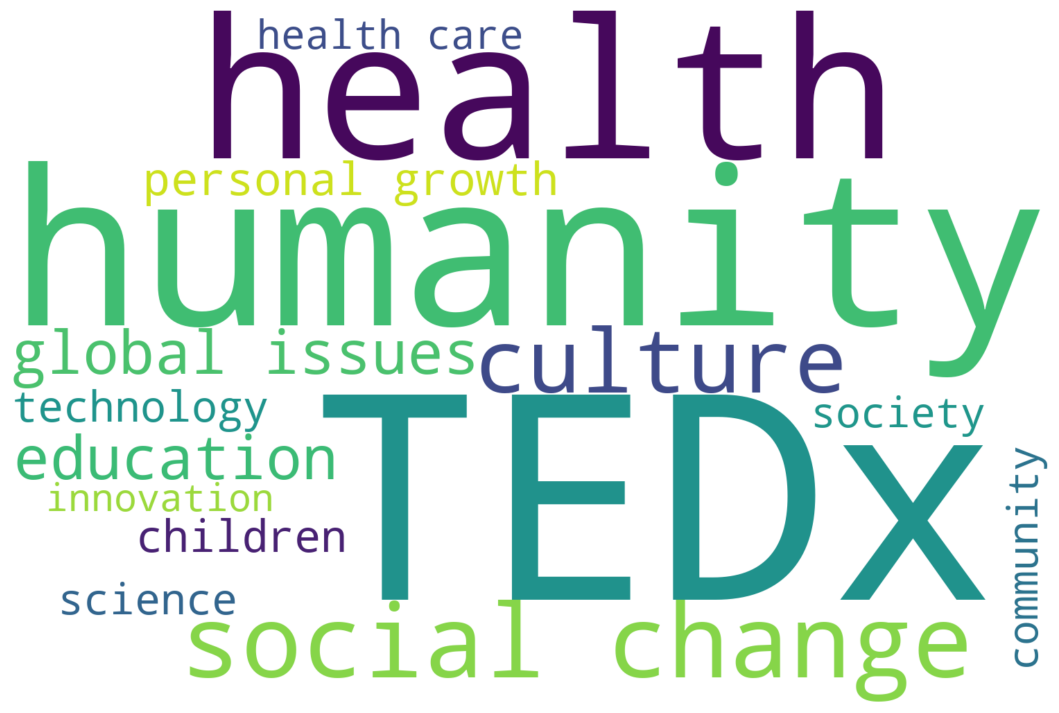

In [367]:
from wordcloud import WordCloud
word_cloud = WordCloud(background_color='white', width=1500, height=1000).generate_from_frequencies(res_dict)
plt.figure(figsize=(15,9))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()